**1**.**importing dataset 'trainbhai.csv' which includes projects ,each project contain a keyword like ML,gamedev,webdev corresponding to unique label value 1,2,3**.






In [221]:

import pandas as pd
data = pd.read_csv('trainbhai.csv',sep="\t")
print(data)

                                            PROJECTS  LABEL
0  BigMart Sales Prediction ML Project  Learn abo...      1
1  Social Media Sentiment Analysis using Twitter ...      1
2         Boston Housing Price Prediction ML Project      1
3                  One Page Responsive Layout webdev      2
4               Multi-Page Responsive Website webdev      2
5                  Small JavaScript Quiz Game webdev      2
6                                       2048 gamedev      3
7                                   ninjarun gamedev      3
8                                  karatsube gamedev      3


**2**. **rows and columns in trainbhai.csv**

**3. viewing first 5 rows of datset**


In [222]:
data.shape



(9, 2)

In [223]:
data.head()

,PROJECTS,LABEL
0,BigMart Sales Prediction ML Project Learn abo...,1
1,Social Media Sentiment Analysis using Twitter ...,1
2,Boston Housing Price Prediction ML Project,1
3,One Page Responsive Layout webdev,2
4,Multi-Page Responsive Website webdev,2


**4.splitting dependent and dependent variables .**

**5. checking if any NULL value or blank spce and removing it.**

In [224]:
X = data["PROJECTS"]
print(X)
y = data["LABEL"]
print(y)
print("//////////////////////////////////")

blanks = []
for ind,label,review in data.itertuples():
  if type(review) == str:
    if review.isspace():
      blanks.append(ind)
print("///////////////////////////////////")
print(len(blanks))

#remove nan values
print(data.dropna(inplace=True))
data.isnull().sum()
#if null value in both coumns


0    BigMart Sales Prediction ML Project  Learn abo...
1    Social Media Sentiment Analysis using Twitter ...
2           Boston Housing Price Prediction ML Project
3                    One Page Responsive Layout webdev
4                 Multi-Page Responsive Website webdev
5                    Small JavaScript Quiz Game webdev
6                                         2048 gamedev
7                                     ninjarun gamedev
8                                    karatsube gamedev
Name: PROJECTS, dtype: object
0    1
1    1
2    1
3    2
4    2
5    2
6    3
7    3
8    3
Name: LABEL, dtype: int64
//////////////////////////////////
///////////////////////////////////
0
None


PROJECTS    0
LABEL       0
dtype: int64

**6. types of label category.**

**7. total number of each category.**

In [225]:
data["LABEL"].unique()
#types of Liked data


array([1, 2, 3])

In [226]:
data["LABEL"].value_counts()
#number of + or - reviews

3    3
2    3
1    3
Name: LABEL, dtype: int64

**8. creating a pipeline**

**9. using tfidf vectorizer**

**10.fitting SVM model to  tain model from dataset trainbhai.csv**

In [227]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
pl = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
pl.fit(X,y)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

**11. opening our text file i.e. bhai.txt which incudes resume information.**

**12. extracing data from projects till skills.**

**13. seperating it with "."**

**14. appending it to new text file bhai1.txt and naming  column as PROJECTS.**

**15. so at step "14" we got our Testing data.**

In [228]:
with open('bhai.txt', 'r') as file:
    data = file.read().replace('\n', '')

import re

y = re.search(r"(?<=projects).*?(?=skills)", data).group(0)
print(y)


print(y.split("."))

import csv

with open('bhai1.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer.writerow(['PROJECTS'])
    for item in y.split('.'):
      print(item)
      tsv_writer.writerow([item])
d = pd.read_csv("bhai1.tsv",sep="\t")
print(d)

data anlysis in X company ML.ML data scientist in USA.text predict ML NLP.ML machine learning professional.pubg gamedev.subway surfer gamedev.gamedev bikeracer.facebook development social software webdev.whatsapp webdev.
['data anlysis in X company ML', 'ML data scientist in USA', 'text predict ML NLP', 'ML machine learning professional', 'pubg gamedev', 'subway surfer gamedev', 'gamedev bikeracer', 'facebook development social software webdev', 'whatsapp webdev', '']
data anlysis in X company ML
ML data scientist in USA
text predict ML NLP
ML machine learning professional
pubg gamedev
subway surfer gamedev
gamedev bikeracer
facebook development social software webdev
whatsapp webdev

                                      PROJECTS
0                 data anlysis in X company ML
1                     ML data scientist in USA
2                          text predict ML NLP
3             ML machine learning professional
4                                 pubg gamedev
5                       

**16.checking if null or blank space in testing data**

1**7.predicting test data and on corresponding value of it incrementing m,w,g.**

**18.ploting m,w,g as a pie chart labelled as 'MACHINE_LEARNING', 'GAME_DEVELOPMENT','WEB',**

**19. clearly filters and classify resume based on projects.**

None
[1 1 1 1 3 3 3 2 2]


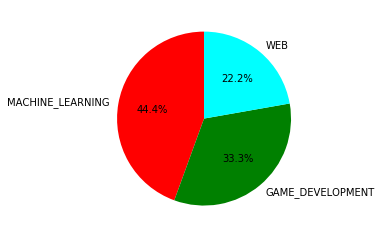

In [229]:
print(d.dropna(inplace=True))
d.isnull().sum()
#if null value in both coumns
predicts = pl.predict(d["PROJECTS"])
print(predicts)
m=0
g=0
w=0
for h in predicts:
  if h==1:
    m=m+1
  elif h==2:
    w=w+1
  elif h==3:
    g = g+1
import matplotlib.pyplot as plt
slices_hours = [m,g,w]
activities = ['MACHINE_LEARNING', 'GAME_DEVELOPMENT','WEB']
colors = ['r', 'g','cyan']
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()



